In [3]:
import os
import random
import numpy as np
from rasterio.windows import Window
import matplotlib.pyplot as plt

In [4]:
def create_random_cubes(hsi_data, num_cubes, cube_size=32):
    """
    Extract random cubes from the HSI data, ensuring they are from non-zero regions.
    """
    cubes = []
    height, width, num_bands = hsi_data.shape
    cube_height = cube_width = cube_size

    # Create a mask of valid regions (non-zero pixels)
    valid_mask = np.any(hsi_data != 0, axis=2)  # True where any band is non-zero

    # Find all valid top-left corner positions
    valid_positions = [
        
        (i, j)
        for i in range(height - cube_height + 1)
        for j in range(width - cube_width + 1)
        if valid_mask[i:i + cube_height, j:j + cube_width].all()
    ]

    if not valid_positions:
        print("Warning: No valid regions found for cube extraction.")
        return []

    for _ in range(num_cubes):
        # Randomly select a valid top-left corner
        top, left = random.choice(valid_positions)

        # Extract the cube
        cube_data = hsi_data[top:top + cube_height, left:left + cube_width, :]
        cubes.append(cube_data)

    return cubes


def save_cube(cube, output_path):
    """
    Save a single cube as a .npy file.
    """
    np.save(output_path, cube)


def process_hsi_file(file_path, output_dir, num_cubes):
    """
    Process a single .npy HSI file to extract and save cubes.
    """
    # Load the .npy data
    hsi_data = np.load(file_path)

    # Extract random cubes
    cubes = create_random_cubes(hsi_data, num_cubes=num_cubes)

    # Save each cube
    base_filename = os.path.basename(file_path).replace('.npy', '')
    for i, cube in enumerate(cubes):
        output_cube_path = os.path.join(output_dir, f"{base_filename}_cube_{i+1}.npy")
        save_cube(cube, output_cube_path)


def process_folder_structure(input_dir, output_dir, num_cubes):
    """
    Process all .npy files in a folder structure to extract and save cubes.
    """
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.npy'):
                input_file_path = os.path.join(root, file)

                # Determine output subdirectory
                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                os.makedirs(output_subdir, exist_ok=True)

                # Process the file
                process_hsi_file(input_file_path, output_subdir, num_cubes=num_cubes)


# Parameters
num_cubes = 30
input_directory = "C:/Users/rafin/Desktop/NSU/NSU 12th Semester/CSE499A.22/Project/Code/Test/Blueberry/Dataset_Code/HSI_Blueberry_Individual_Masked"
output_directory = "C:/Users/rafin/Desktop/NSU/NSU 12th Semester/CSE499A.22/Project/Code/Test/Blueberry/Dataset_Code/HSI_Blueberry_Individual_Masked_32x32"

# Process the folder structure
process_folder_structure(input_directory, output_directory, num_cubes)


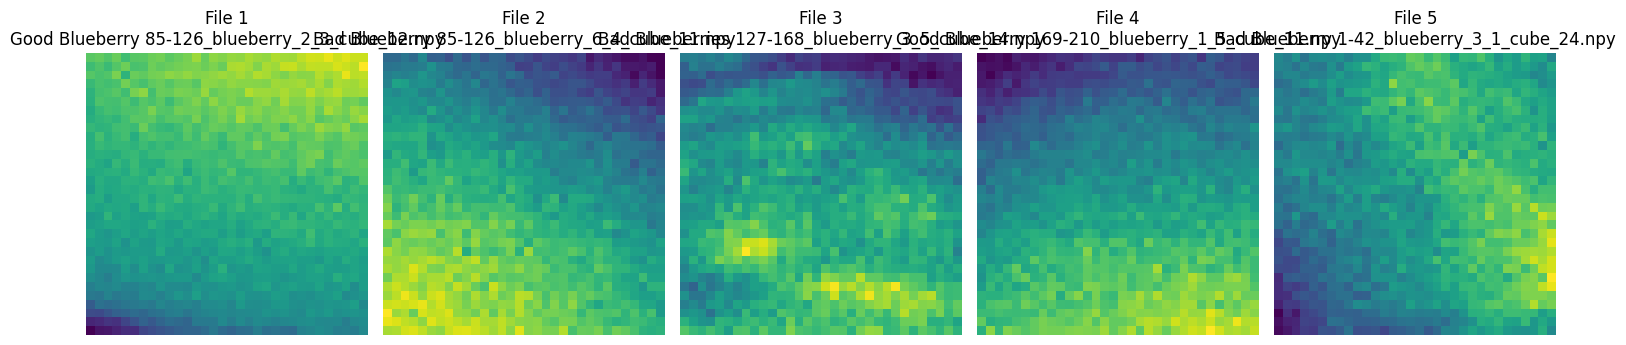

In [11]:
def visualize_random_images(output_dir, num_images=5, band_index=399):
    """
    Visualizes random images from the masked HSI directory.
    
    Args:
    - output_dir (str): Path to the directory containing masked .npy files.
    - num_images (int): Number of random images to visualize.
    - band_index (int): Spectral band to visualize.
    """
    
    # Collect all .npy files from the output directory
    file_paths = []
    
    for root, _, files in os.walk(output_dir):
        
        for file in files:
            
            if file.endswith('.npy'):
                
                file_paths.append(os.path.join(root, file))
    
    
    if len(file_paths) < num_images:
        
        print(f"Only {len(file_paths)} files found. Visualizing all available files.")
        num_images = len(file_paths)
    
    
    # Randomly select files to visualize
    selected_files = random.sample(file_paths, num_images)
    
    
    # Plot the selected images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    if num_images == 1:
        
        axes = [axes]  # Ensure axes is always iterable
    
    
    for i, file_path in enumerate(selected_files):
        
        hsi_data = np.load(file_path)
        band_image = hsi_data[:, :, band_index]
        
        ax = axes[i]
        ax.imshow(band_image, cmap='viridis')
        ax.set_title(f"File {i+1}\n{os.path.basename(file_path)}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Define the output directory
output_directory = "C:/Users/rafin/Desktop/NSU/NSU 12th Semester/CSE499A.22/Project/Code/Test/Blueberry/Dataset_Code/HSI_Blueberry_Individual_Masked_32x32"

# Visualize random images
visualize_random_images(output_directory)